<h1>CNN</h1>

In [1]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Obfuscated-MalMem2022-classification.csv')

In [65]:
print(data.columns)

Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_p

In [4]:
int_columns=data.select_dtypes(include='int')
float_columns=data.select_dtypes(include='float')
cat_columns=data.select_dtypes(include='object')
print(cat_columns.nunique())

Class        2
Category     4
Family      16
dtype: int64


In [5]:
print(cat_columns.value_counts())

Class    Category    Family      
Benign   Benign      Benign          14649
Malware  Spyware     Transponder      2410
                     Gator            2200
         Ransomware  Shade            2128
                     Ako              2000
         Spyware     180solutions     2000
                     CWS              2000
         Trojan      Refroso          2000
                     Scar             2000
         Ransomware  Conti            1988
         Trojan      Emotet           1967
         Ransomware  Maze             1958
         Trojan      Zeus             1950
         Ransomware  Pysa             1717
         Trojan      Reconyc          1570
         Spyware     TIBS             1410
dtype: int64


C:\Users\H.A.R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


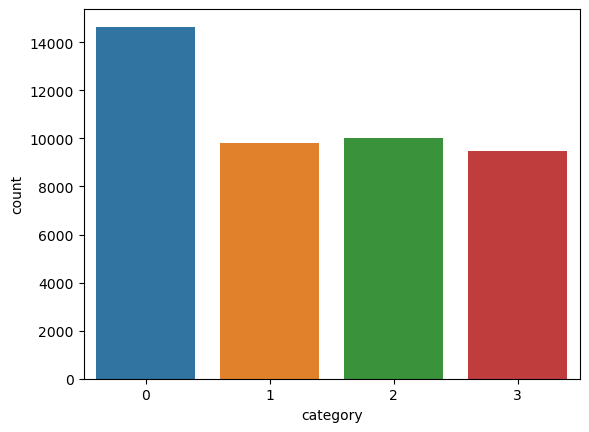

In [3]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data['category']=lab.fit_transform(data['Category'])
data['class']=lab.fit_transform(data['Class'])
data['family']=lab.fit_transform(data['Family'])
sn.countplot(data['category'])
plt.show()

In [4]:
x=data[['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads', 
        'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_pslist_false_avg',
       'psxview.not_in_eprocess_pool_false_avg',
       'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_pspcid_list_false_avg',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg',
       'modules.nmodules', 'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.fs_drivers', 'svcscan.process_services',
       'svcscan.shared_process_services',
       'svcscan.nactive',
       'callbacks.ncallbacks', 'callbacks.nanonymous', 'callbacks.ngeneric', 'class', 'family']]
y=data[['category']]
print(y) 

       category
0             3
1             1
2             0
3             0
4             0
...         ...
43942         0
43943         0
43944         3
43945         0
43946         1

[43947 rows x 1 columns]


In [5]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the features using Min-Max Scaling
min_max_X_scaled = scaler.fit_transform(x)

# Create a new DataFrame with the scaled features
min_max_X_scaled_df = pd.DataFrame(min_max_X_scaled, columns=x.columns)

# Display the first few rows of the scaled DataFrame
print(min_max_X_scaled_df.head())

   pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0      0.077626      0.109375            0.555699             0.007233   
1      0.077626      0.109375            0.529675             0.006791   
2      0.100457      0.140625            0.613098             0.008809   
3      0.086758      0.078125            0.779835             0.010637   
4      0.095890      0.078125            0.734706             0.010179   

   dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
0       0.295348                   0.695694          0.004440   
1       0.283448                   0.676725          0.004040   
2       0.437793                   0.796817          0.007078   
3       0.496574                   0.949923          0.008167   
4       0.516048                   0.912020          0.008422   

   handles.avg_handles_per_proc  handles.nfile  handles.nevent  ...  \
0                      0.004250       0.000461        0.273318  ...   
1                     

In [6]:
x = min_max_X_scaled_df
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
print(x_train.shape)

(32960, 54)


In [7]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({'category': 1})
Testing target statistics: Counter({'category': 1})


In [8]:
X_res.shape

(44116, 54)

In [9]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming 'y_train' and 'y_test' are the target labels for the training and testing sets, respectively

# Perform one-hot encoding for the target labels
num_classes = len(np.unique(y_res))  # Number of unique classes in the dataset
y_train_encoded = to_categorical(y_res, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

In [11]:
pip install xgboost

     -------------------------------------- 99.7/99.7 MB 599.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming 'X_train', 'y_train', 'X_val', 'y_val' contain the features and labels for the classification task
# Assuming the number of classes is 4 (since there are four classes)

# One-hot encode the class labels for training and validation data
num_classes = 4

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only (not the validation data)
X_train_resampled, y_train_resampled = smote.fit_resample(X_res, y_train_encoded)

# Create the model
classification_model = Sequential()
classification_model.add(Dense(128, activation='relu', input_shape=(54,)))
classification_model.add(Dense(64, activation='relu'))
classification_model.add(Dense(num_classes, activation='softmax'))  # 'softmax' activation for multi-class output layer

# Compile the model
classification_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with resampled data
classification_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(x_test, y_test_encoded))

import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the XGBoost classifier on the training data
xgb_classifier.fit(x_train, y_train)

# Make predictions on the test data
predictions = xgb_classifier.predict(x_test)

# Calculate the confusion matrix
cf = confusion_matrix(y_test, predictions)
print(cf)

# Calculate the accuracy score
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)


import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier()

# Train the LightGBM classifier on the training data
lgb_classifier.fit(x_train, y_train)

# Make predictions on the test data
predictions = lgb_classifier.predict(x_test)

# Calculate the confusion matrix
cf = confusion_matrix(y_test, predictions)
print(cf)

# Calculate the accuracy score
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)


Epoch 1/10
1379/1379 [==============================] - 2s 1ms/step - loss: 0.7413 - accuracy: 0.6175 - val_loss: 0.5965 - val_accuracy: 0.6825
Epoch 2/10
1379/1379 [==============================] - 2s 1ms/step - loss: 0.6533 - accuracy: 0.6483 - val_loss: 0.5598 - val_accuracy: 0.7107
Epoch 3/10
1379/1379 [==============================] - 2s 1ms/step - loss: 0.5776 - accuracy: 0.6929 - val_loss: 0.4420 - val_accuracy: 0.8041
Epoch 4/10
1379/1379 [==============================] - 2s 1ms/step - loss: 0.3745 - accuracy: 0.8676 - val_loss: 0.2315 - val_accuracy: 0.9385
Epoch 5/10
1379/1379 [==============================] - 2s 1ms/step - loss: 0.2037 - accuracy: 0.9370 - val_loss: 0.1401 - val_accuracy: 0.9493
Epoch 6/10
1379/1379 [==============================] - 2s 1ms/step - loss: 0.1165 - accuracy: 0.9655 - val_loss: 0.0722 - val_accuracy: 0.9879
Epoch 7/10
1379/1379 [==============================] - 2s 1ms/step - loss: 0.0620 - accuracy: 0.9928 - val_loss: 0.0342 - val_accuracy:

ModuleNotFoundError: No module named 'lightgbm'

<h1>Recurrent Neural Networks (RNNs) and Long Short-Term Memory networks (LSTMs)</h1>

In [13]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [29]:
# Load the CSV dataset into a DataFrame
data = pd.read_csv('Obfuscated-MalMem2022-classification.csv')

C:\Users\H.A.R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


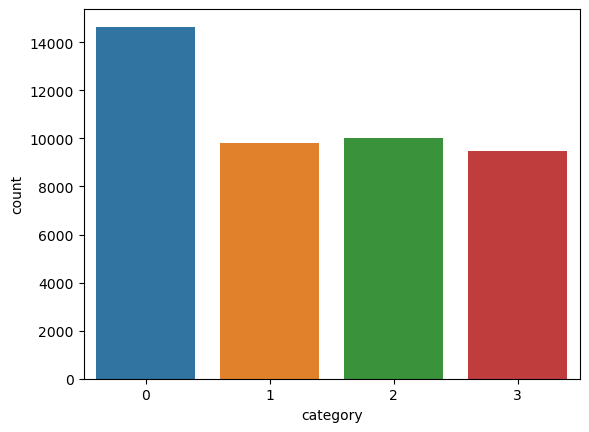

In [30]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data['category']=lab.fit_transform(data['Category'])
data['class']=lab.fit_transform(data['Class'])
data['family']=lab.fit_transform(data['Family'])

data = data.drop(['Class'], axis=1)
data = data.drop(['Category'], axis=1)
data = data.drop(['Family'], axis=1)
#dropping category and family
data = data.drop(['family'], axis=1)
#data = data.drop(['category'], axis=1)
sn.countplot(data['category'])
plt.show()

In [55]:
data.shape

(43947, 57)

In [31]:
# Separate features and labels
X = data.iloc[:, :-1].values
y = data['category'].values
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape

(35157, 56)

In [18]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({3: 11678, 0: 11678, 1: 11678, 2: 11678})
Testing target statistics: Counter({0: 2971, 2: 1982, 1: 1949, 3: 1888})


In [19]:
X_train.shape

(46712, 56)

In [20]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only (not the validation data)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [21]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple MLP model for tabular data
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = 56  # Number of features
hidden_size = 128
num_classes = 4  # Assuming binary classification
learning_rate = 0.1
num_epochs = 10

model = MLPModel(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

test_accuracy = evaluate(model, test_loader)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch [1/10], Loss: 0.2065
Epoch [2/10], Loss: 0.0000
Epoch [3/10], Loss: 33.7471
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000
Test Accuracy: 99.91%
